In [14]:
import json
import pickle
import importlib
from src.latent_vector_approximator import LatentVectorApproximator
from src.utils.utils import get_training_and_validation_sets_gray_scale, loss_function

In [7]:
X_train, Y_train, cX_train, X_val, Y_val, cX_val = get_training_and_validation_sets_gray_scale()

In [8]:
with open('config/gray_scale_config.json', 'r') as config_file:
    config = json.load(config_file)

In [11]:
def import_from_string(dotted_path):
    module_path, _, function_name = dotted_path.rpartition('.')
    module = importlib.import_module(module_path)
    return getattr(module, function_name)

loss_function = import_from_string(config['loss_function'])
config.pop('loss_function')

'src.utils.utils.loss_function'

In [12]:
model = LatentVectorApproximator(loss_function=loss_function, **config)

LatentVectorApproxiator initialized


In [13]:
model.train(X_train, cX_train, X_val, cX_val, pre_train_epochs=25, epochs=5, batch_size=32)

Training VAE
Epoch 1/25
136/136 [==============================] - 68s 480ms/step - loss: 0.0904 - mse: 0.0742 - val_loss: 0.0510 - val_mse: 0.0354
Epoch 2/25
136/136 [==============================] - 76s 560ms/step - loss: 0.0299 - mse: 0.0152 - val_loss: 0.0239 - val_mse: 0.0113
Epoch 3/25
136/136 [==============================] - 84s 621ms/step - loss: 0.0235 - mse: 0.0110 - val_loss: 0.0234 - val_mse: 0.0113
Epoch 4/25
136/136 [==============================] - 79s 582ms/step - loss: 0.0230 - mse: 0.0108 - val_loss: 0.0227 - val_mse: 0.0099
Epoch 5/25
136/136 [==============================] - 71s 523ms/step - loss: 0.0227 - mse: 0.0105 - val_loss: 0.0227 - val_mse: 0.0107
Epoch 6/25
136/136 [==============================] - 73s 539ms/step - loss: 0.0224 - mse: 0.0103 - val_loss: 0.0227 - val_mse: 0.0114
Epoch 7/25
136/136 [==============================] - 74s 540ms/step - loss: 0.0222 - mse: 0.0102 - val_loss: 0.0223 - val_mse: 0.0100
Epoch 8/25
136/136 [======================

### Learning curves

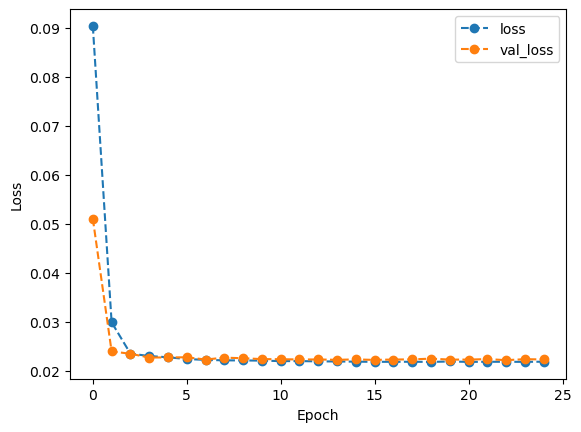

In [15]:
model.vae.visualize_loss()

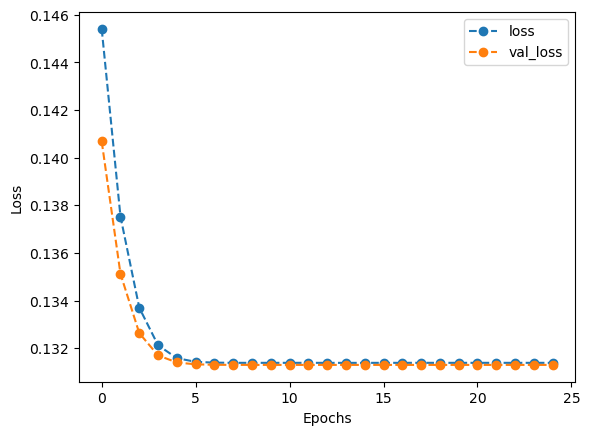

In [16]:
model.generator1.visualize_loss()

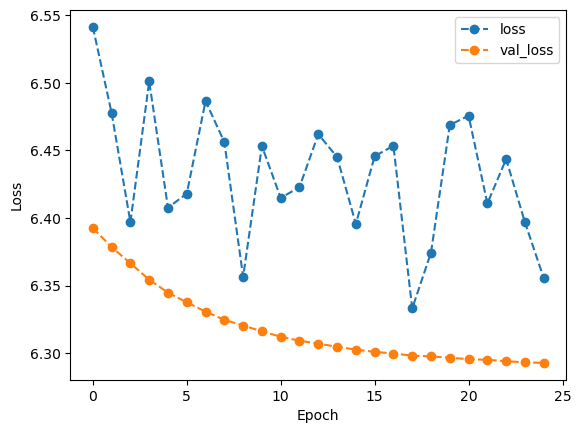

In [17]:
model.ipvae.visualize_loss()

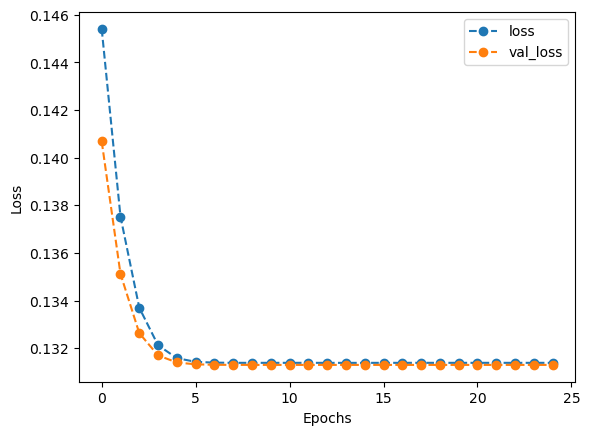

In [18]:
model.generator2.visualize_loss()

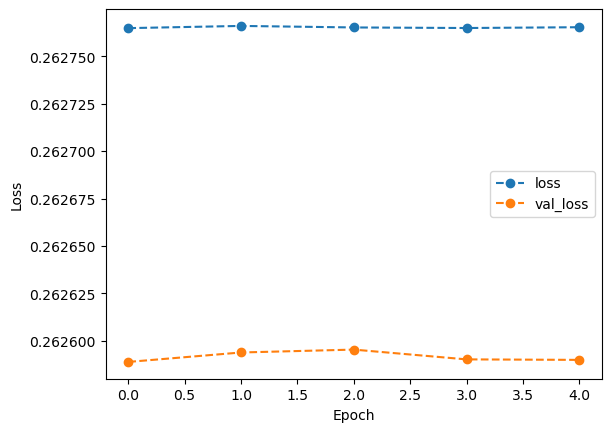

In [19]:
model.visualize_loss()

### Results

1/1 [==============================] - 0s 432ms/step


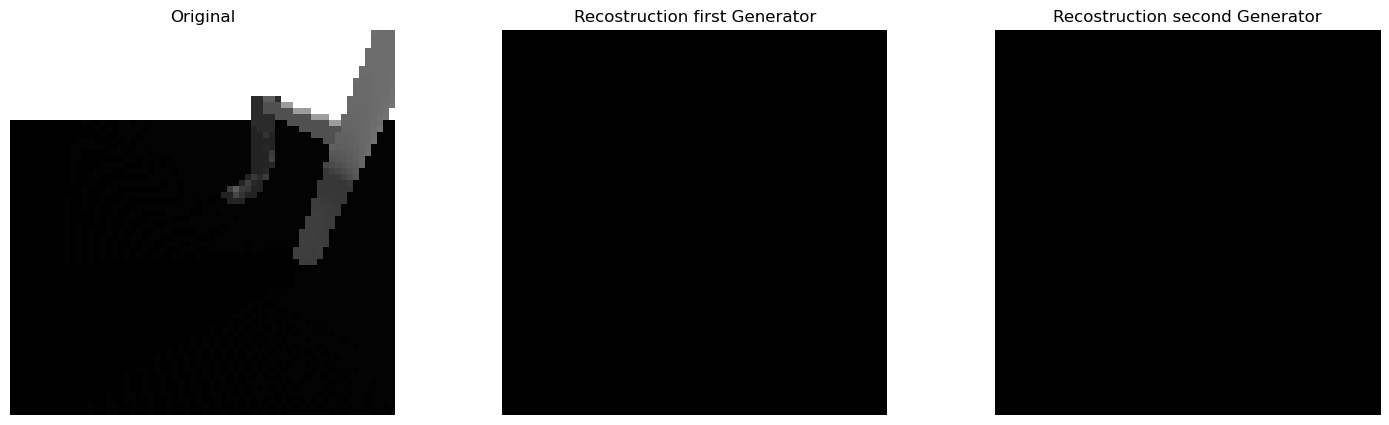

1/1 [==============================] - 0s 33ms/step


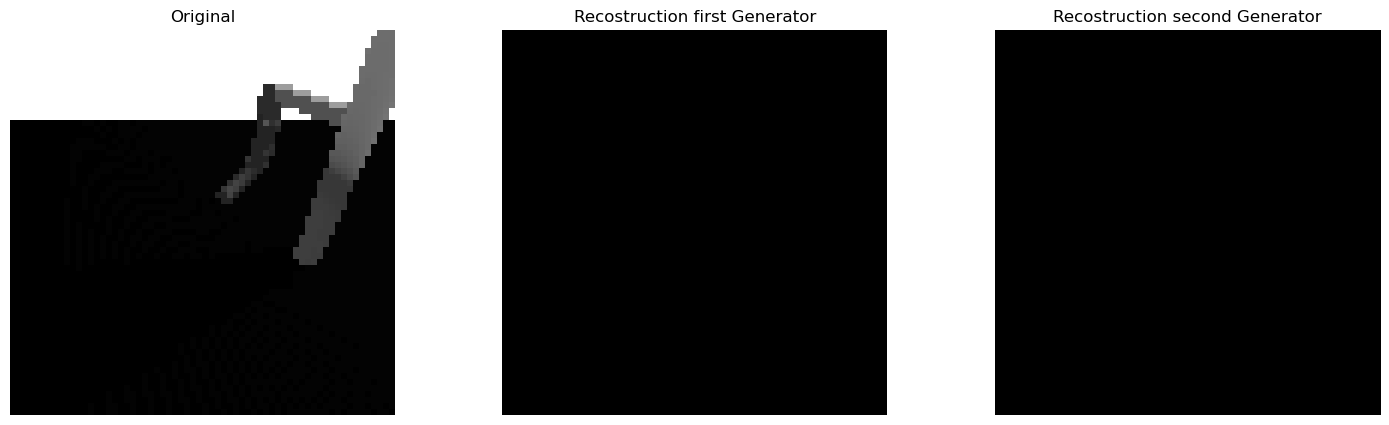

1/1 [==============================] - 0s 32ms/step


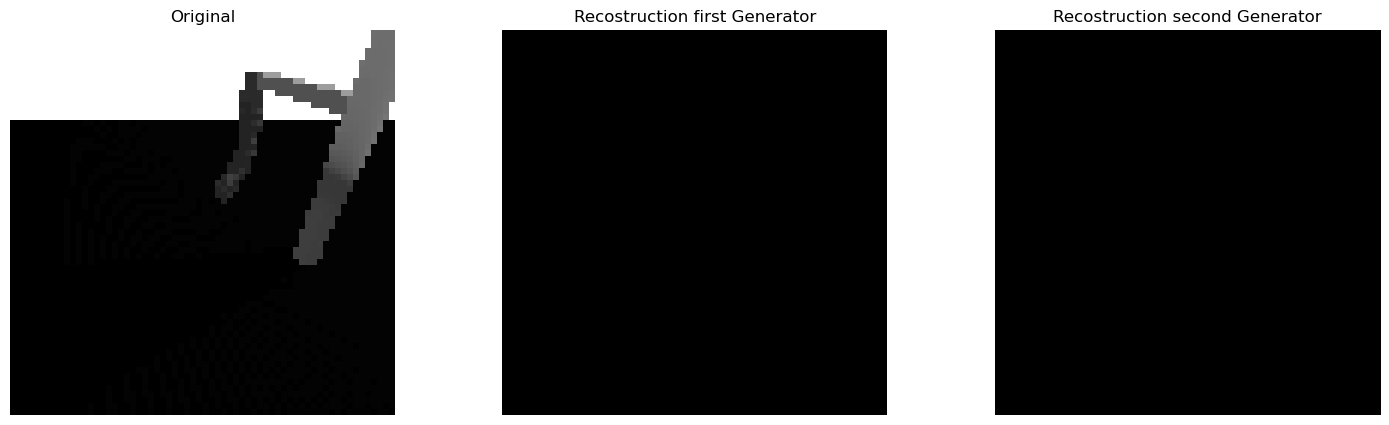

1/1 [==============================] - 0s 31ms/step


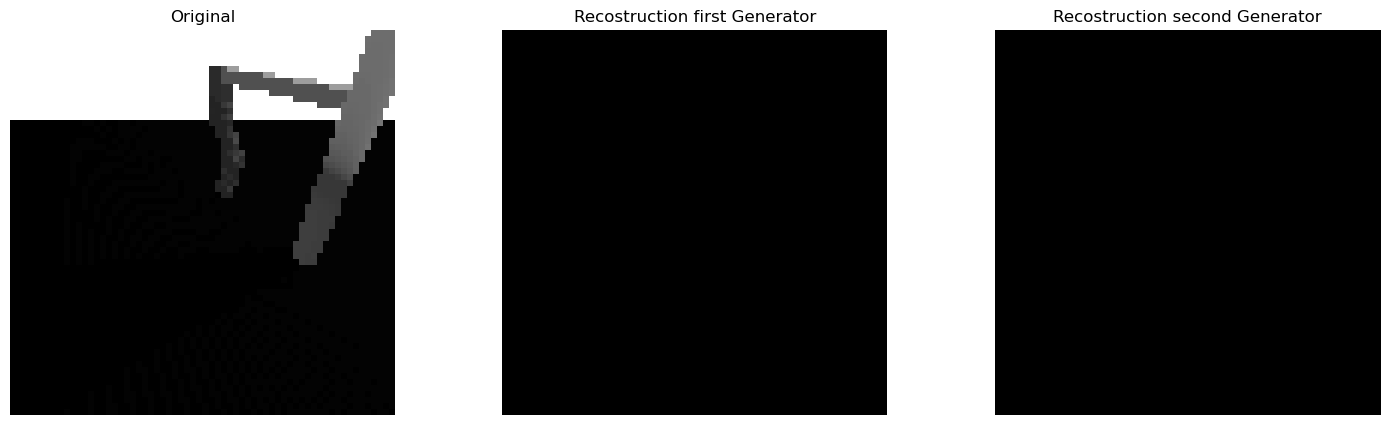

1/1 [==============================] - 0s 33ms/step


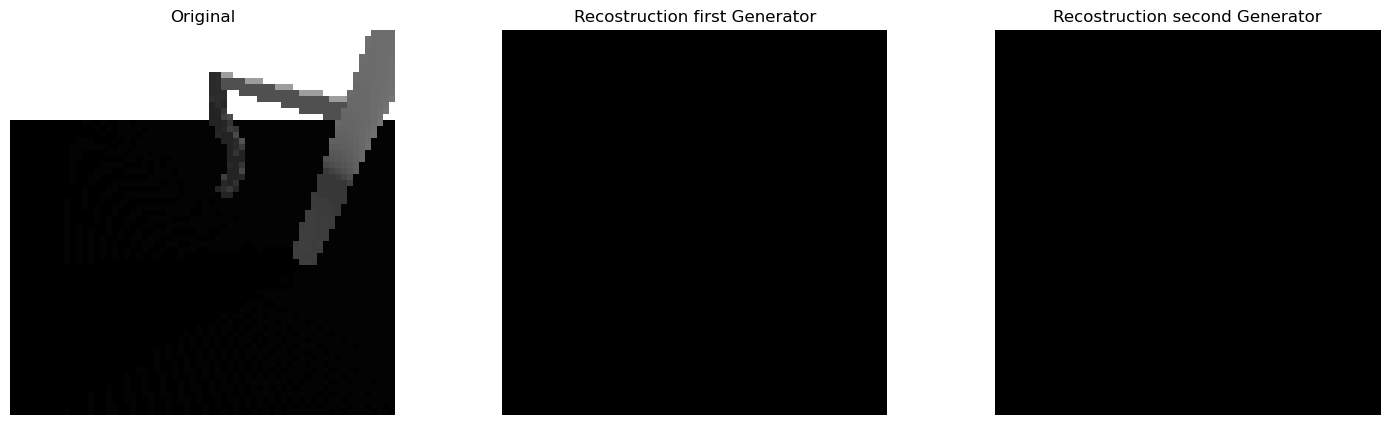

1/1 [==============================] - 0s 32ms/step


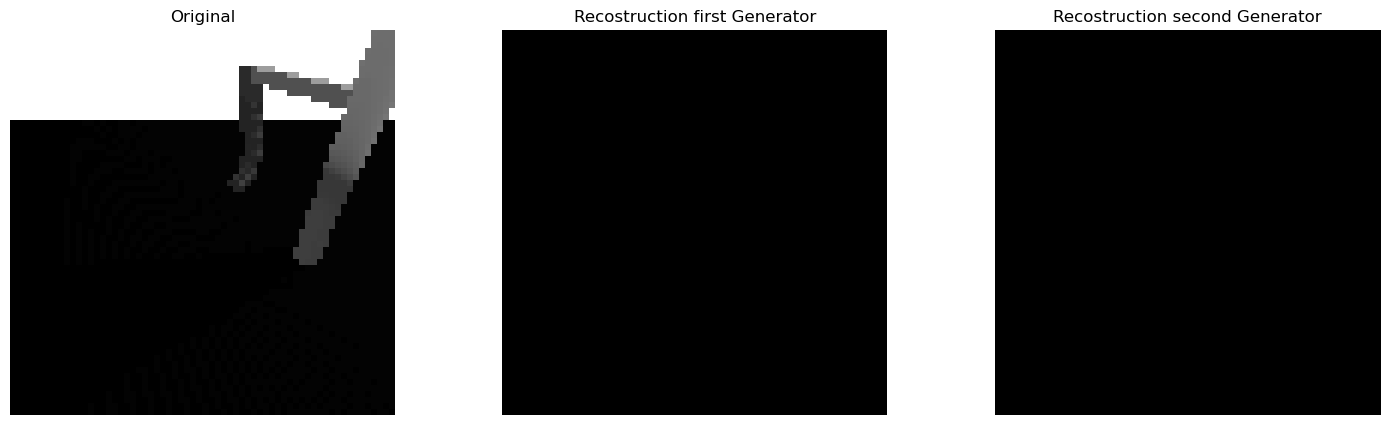

1/1 [==============================] - 0s 37ms/step


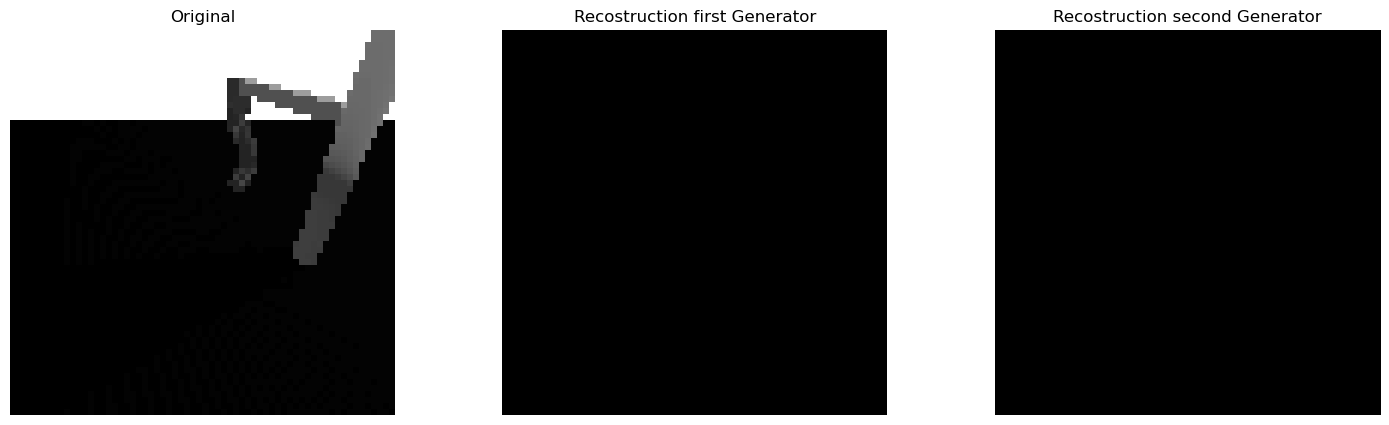

1/1 [==============================] - 0s 33ms/step


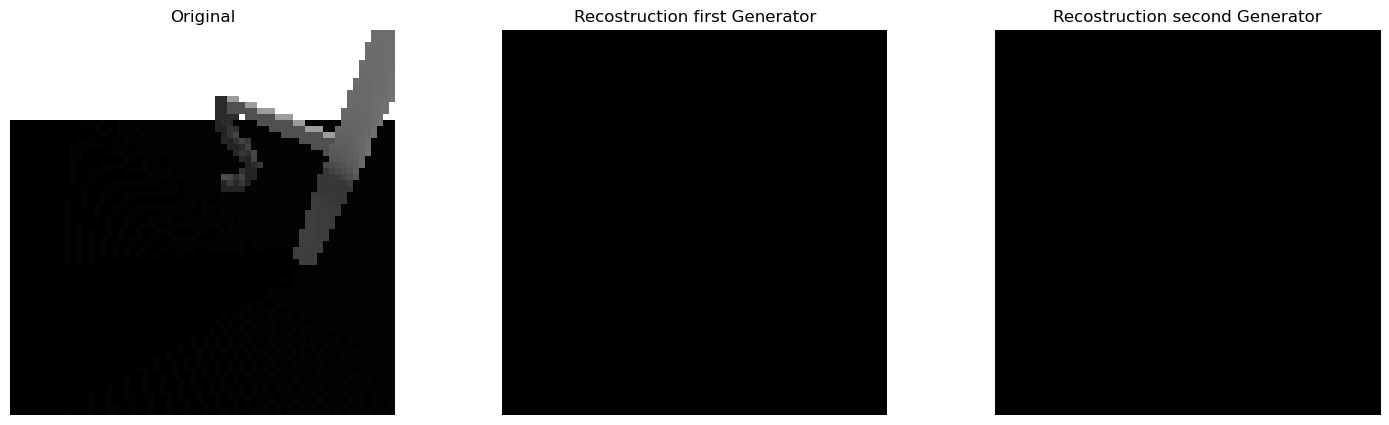

1/1 [==============================] - 0s 34ms/step


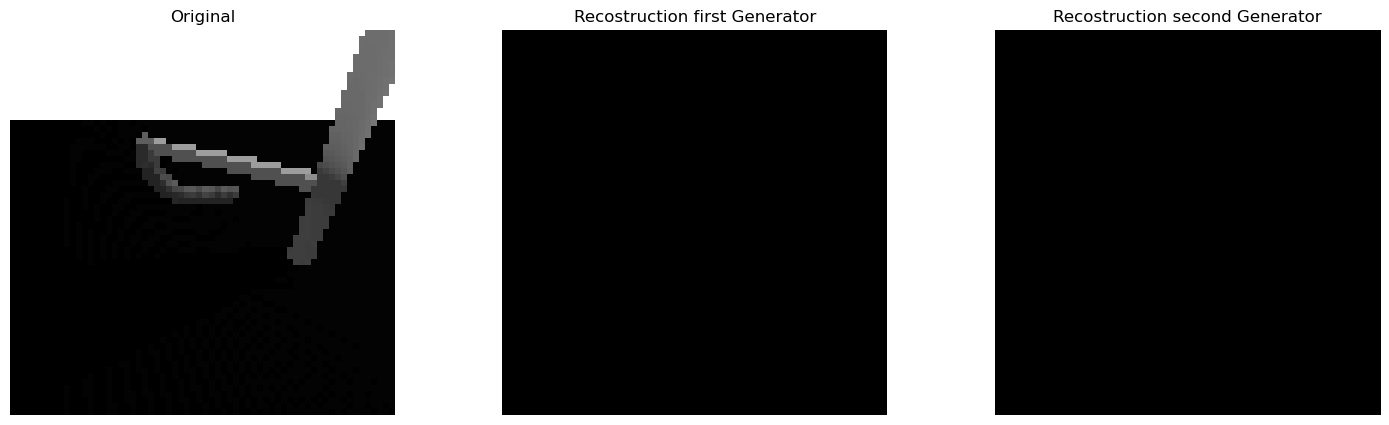

1/1 [==============================] - 0s 35ms/step


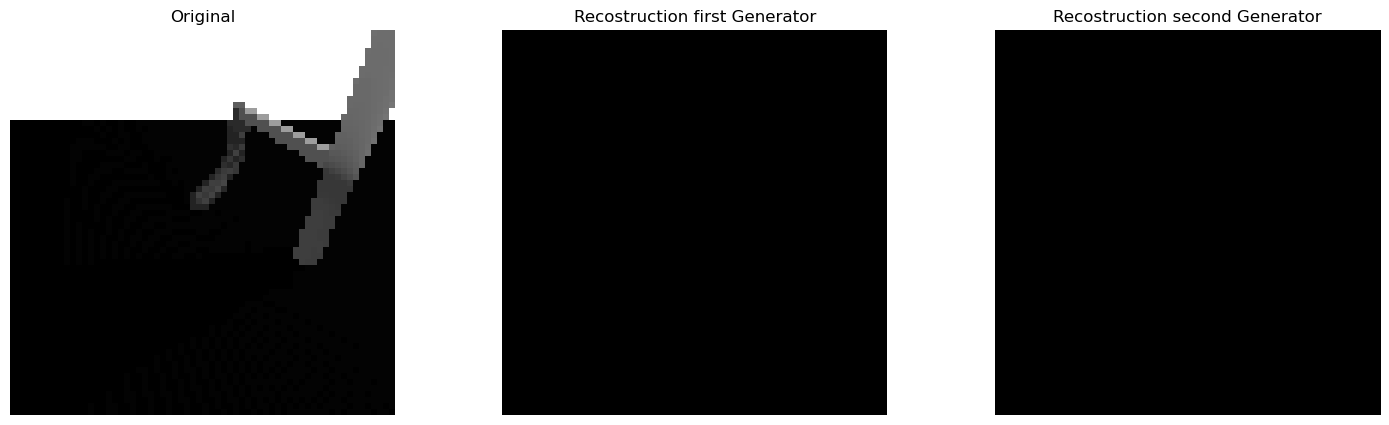

In [20]:
for i in range(10):
    model.visualize_recostruction(X_val[i*23], cX_val[i*23])

### Test save latent vectors

In [30]:
def compute_latent_vector(self, X):
        if len(X.shape) == 3:
            X = X.reshape(1, *X.shape)
        _, _, z1 = self.vae.encoder.predict(X)
        _, _, z = self.ipvae.encoder.predict(z1) # identity preserving VAE

        return z1, z

In [32]:
compute_latent_vector(model, X_val[0])

1/1 [==============================] - 0s 23ms/step


(array([[-0.4372477, -0.9482316,  1.2776607, ...,  1.7379873, -0.513669 ,
          3.3220077]], dtype=float32),
 array([[-0.69620055, -0.10873041,  0.11982563, ..., -0.38700032,
         -0.05583951, -0.9893827 ]], dtype=float32))

In [31]:
X_train_z1, X_train_z = compute_latent_vector(model, X_train)
X_val_z1, X_val_z = compute_latent_vector(model, X_val)

X_train_z1.shape, X_train_z.shape, X_val_z1.shape, X_val_z.shape

34/34 [==============================] - 0s 13ms/step


((4346, 1280), (4346, 1280), (1087, 1280), (1087, 1280))

In [33]:
def save_latent_vectors(X_z1, X_z, filename):
    with open(filename, 'wb') as f:
        pickle.dump((X_z1, X_z), f)

save_latent_vectors(X_train_z1, X_train_z, 'predictions/latent_vectors_gray_scale_train.pkl')
save_latent_vectors(X_val_z1, X_val_z, 'predictions/latent_vectors_gray_scale_val.pkl')

In [35]:
from src.utils.utils import get_test_set_gray_scale

X_test, Y_test, cX_test = get_test_set_gray_scale()

X_test_z1, X_test_z = compute_latent_vector(model, X_test)

save_latent_vectors(X_test_z1, X_test_z, 'predictions/latent_vectors_gray_scale_test.pkl')

69/69 [==============================] - 1s 8ms/step


In [36]:
def read_latent_vectors(filename):
    with open(filename, 'rb') as f:
        return pickle.load(f)

X_train_z1, X_train_z = read_latent_vectors('predictions/latent_vectors_gray_scale_train.pkl')
X_val_z1, X_val_z = read_latent_vectors('predictions/latent_vectors_gray_scale_val.pkl')
X_test_z1, X_test_z = read_latent_vectors('predictions/latent_vectors_gray_scale_test.pkl')

X_train_z1.shape, X_train_z.shape, X_val_z1.shape, X_val_z.shape, X_test_z1.shape, X_test_z.shape

((4346, 1280),
 (4346, 1280),
 (1087, 1280),
 (1087, 1280),
 (2196, 1280),
 (2196, 1280))